# Introduction to Functions

R is a functional language. Function is treated as an object as R is an Object oriented language.<br>
To understand R, two slogans are helpful.
- Everything that exists is an object
- Everything that happens is a function call

<br>
Example: boo()<br>
data()<br>
demo()<br>
prcomp(foo)<br>
ksvm(x,y)<br>
<br>
Every functions will have an operning and closing parenthesis.
<br><br>

There are 3 things that can be mentioned inside the parenthesis:
- Formula - Like in Linear regression, we might need to give a formula which describes the relation between the variables. It will have ~ sign. Right hand side will be the predictor and on the left hand side, we have the response.

- Argument - Objects that will be passed as input to the functions. lm(data = dummy)

- Arguments to other functions - These are the arguments to other functions which will be called from inside a function.

fname <- function(formula = , arg1 = default_value, arg2, ..){ <br>
    [function body]<br>
    
    return(list_of_output_values)
}

<br>
return is optional. But it is advised to use. 

In [1]:
help(lm)

# Matching each argument's class

Whenever there is an error while calling a function, 

First: The argument object's class in f() call must match.

# Calling function by its signature

In [2]:
help(hist)

List of 6
 $ breaks  : num [1:10] 0 2000 4000 6000 8000 10000 12000 14000 16000 18000
 $ counts  : int [1:9] 41 2 1 1 1 1 0 0 1
 $ density : num [1:9] 4.27e-04 2.08e-05 1.04e-05 1.04e-05 1.04e-05 ...
 $ mids    : num [1:9] 1000 3000 5000 7000 9000 11000 13000 15000 17000
 $ xname   : chr "islands"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


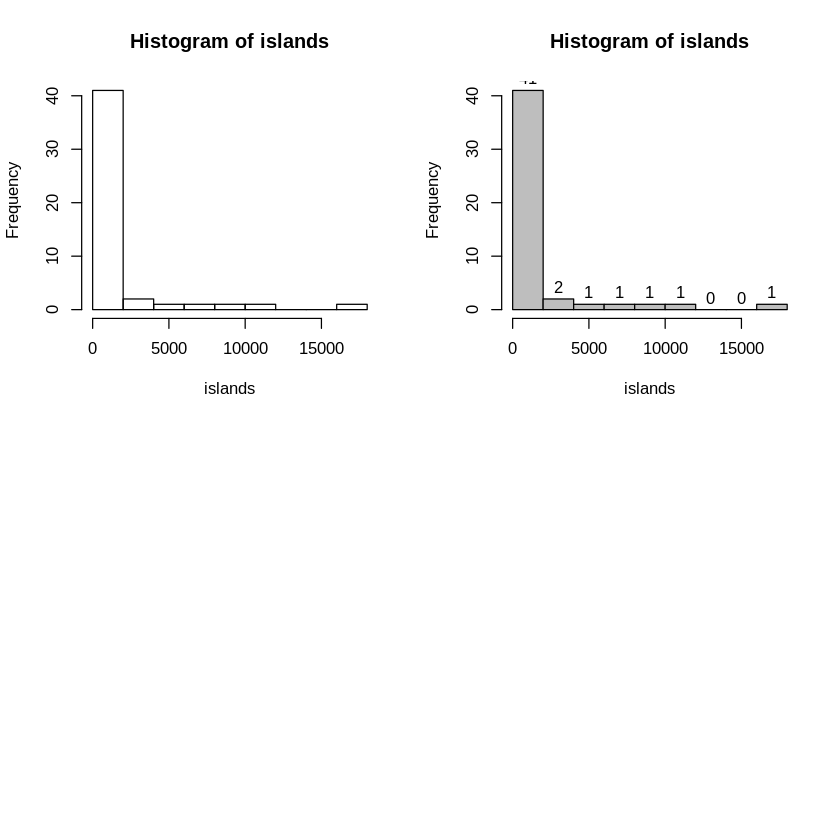

In [3]:
op <- par(mfrow = c(2, 2))
hist(islands)
utils::str(hist(islands, col = "gray", labels = TRUE))


hist> op <- par(mfrow = c(2, 2))

hist> hist(islands)

hist> utils::str(hist(islands, col = "gray", labels = TRUE))
List of 6
 $ breaks  : num [1:10] 0 2000 4000 6000 8000 10000 12000 14000 16000 18000
 $ counts  : int [1:9] 41 2 1 1 1 1 0 0 1
 $ density : num [1:9] 4.27e-04 2.08e-05 1.04e-05 1.04e-05 1.04e-05 ...
 $ mids    : num [1:9] 1000 3000 5000 7000 9000 11000 13000 15000 17000
 $ xname   : chr "islands"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"

hist> hist(sqrt(islands), breaks = 12, col = "lightblue", border = "pink")

hist> ##-- For non-equidistant breaks, counts should NOT be graphed unscaled:
hist> r <- hist(sqrt(islands), breaks = c(4*0:5, 10*3:5, 70, 100, 140),
hist+           col = "blue1")

hist> text(r$mids, r$density, r$counts, adj = c(.5, -.5), col = "blue3")

hist> sapply(r[2:3], sum)
   counts   density 
48.000000  0.215625 

hist> sum(r$density * diff(r$breaks)) # == 1
[1] 1

hist> lines(r, lty = 3, border = "purple") # -> lines.histogram(*)

hi

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”

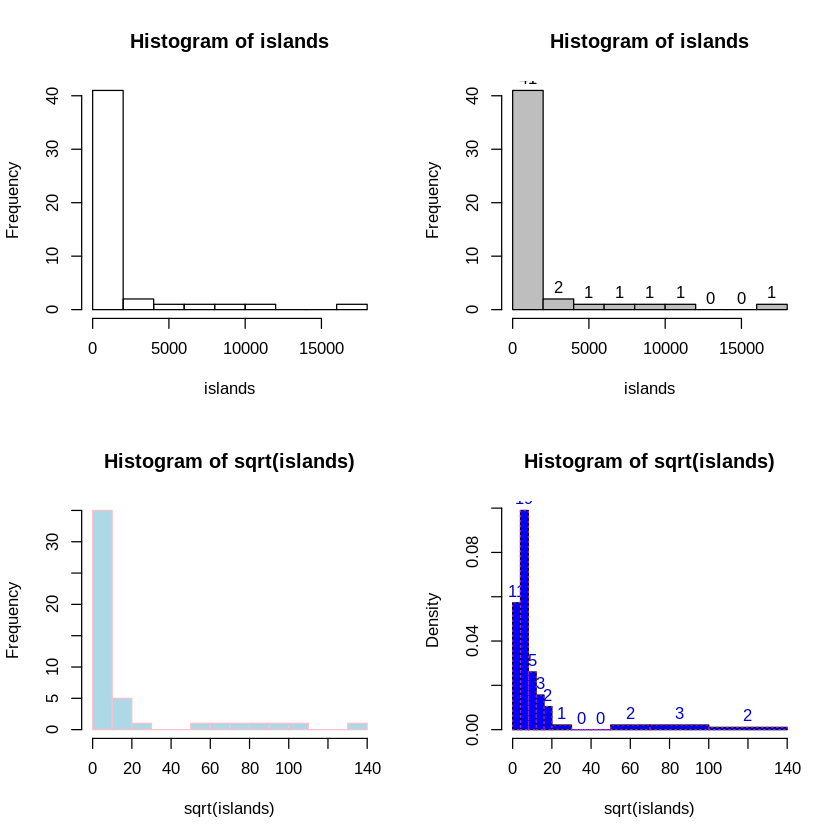


hist> ## No test: ##D 
hist> ##D ## Extreme outliers; the "FD" rule would take very large number of 'breaks':
hist> ##D XXL <- c(1:9, c(-1,1)*1e300)
hist> ##D hh <- hist(XXL, "FD") # did not work in R <= 3.4.1; now gives warning
hist> ##D ## pretty() determines how many counts are used (platform dependently!):
hist> ##D length(hh$breaks) ## typically 1 million -- though 1e6 was "a suggestion only"
hist> ## End(No test)
hist> require(stats)

hist> set.seed(14)

hist> x <- rchisq(100, df = 4)

hist> ## Don't show: 
hist> op <- par(mfrow = 2:1, mgp = c(1.5, 0.6, 0), mar = .1 + c(3,3:1))

hist> ## End(Don't show)
hist> ## Comparing data with a model distribution should be done with qqplot()!
hist> qqplot(x, qchisq(ppoints(x), df = 4)); abline(0, 1, col = 2, lty = 2)

hist> ## if you really insist on using hist() ... :
hist> hist(x, freq = FALSE, ylim = c(0, 0.2))


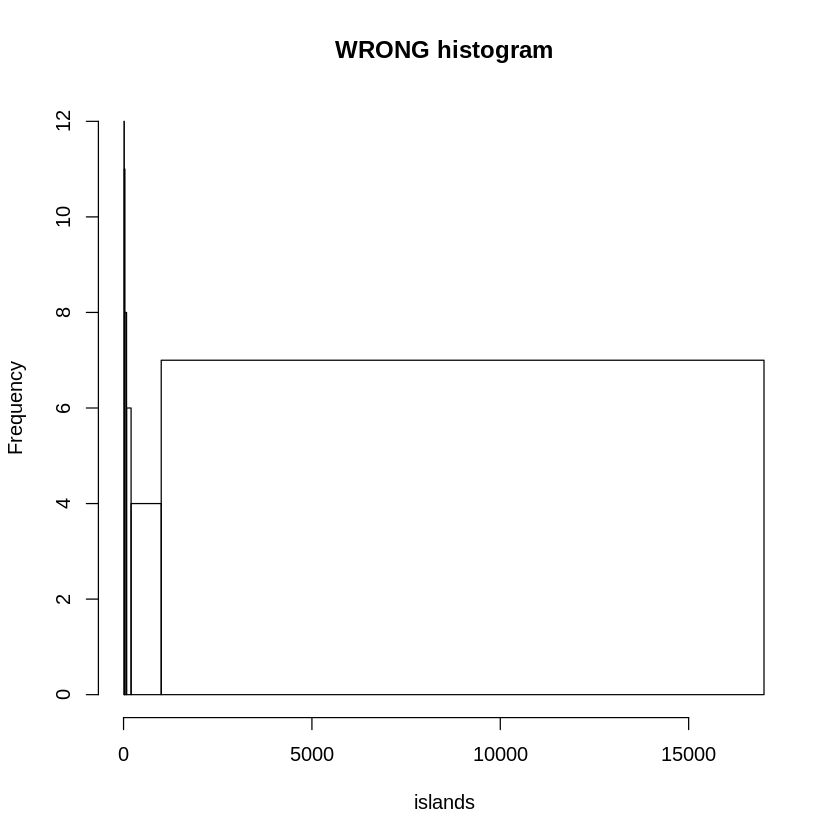


hist> curve(dchisq(x, df = 4), col = 2, lty = 2, lwd = 2, add = TRUE)

hist> ## Don't show: 
hist> par(op)

hist> ## End(Don't show)
hist> 
hist> 
hist> 


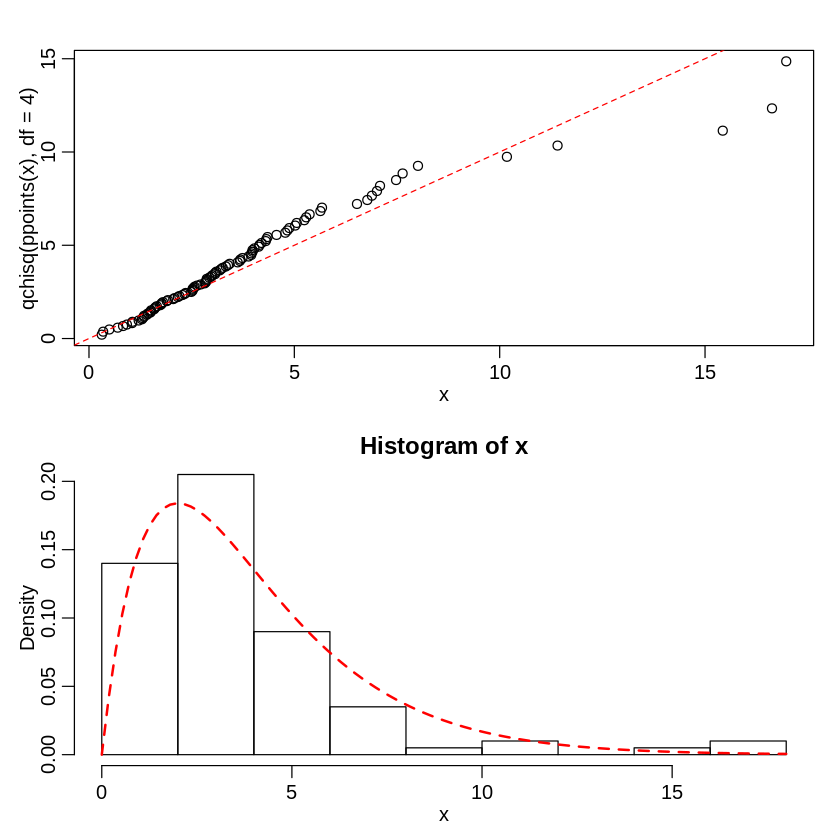

In [5]:
example(hist)

In [6]:
help(rnorm)

In [7]:
x = rnorm(10)

In [8]:
x

[1]  1.07428564 -1.42125894  0.07065709  1.64828501 -1.43106387  0.87397931
 [7] -1.03087092 -0.69340405  0.50653689  0.85978011

# Function Description

In [10]:
my_sum <- function(x1, x2){
    return (x1+x2)
}

In [12]:
my_sum

function(x1, x2){
    return (x1+x2)
}

In [13]:
mode(my_sum)

[1] "function"

In [14]:
class(my_sum)

[1] "function"

In [15]:
lm

function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
{
    ret.x <- x
    ret.y <- y
    cl <- match.call()
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (method == "model.frame") 
        return(mf)
    else if (method != "qr") 
        warning(gettextf("method = '%s' is not supported. Using 'qr'", 
            method), domain = NA)
    mt <- attr(mf, "terms")
    y <- model.response(mf, "numeric")
    w <- as.vector(model.weights(mf))
    if (!is.null(w) && !is.numeric(w)) 
        stop("'weights' must be a numeric vector")
    offset <- as.vector(model.offset(mf))
    if (!is.null(offset)) {
        if (length(offset) != NROW(y)) 
            stop(gettextf("number of offsets is %d, should equal %d (number of observations)", 
                length(offset), NROW(y)), domain = NA)
    }
    if (is.empty.model(mt)) {
        x <- NULL
        z <- list(coefficients = if (is.matrix(y)) matrix(, 0, 
            3) else numeric(), residuals = y, fitted.values = 0 * 
            y, weights = w, rank = 0L, df.residual = if (!is.null(w)) sum(w != 
            0) else if (is.matrix(y)) nrow(y) else length(y))
        if (!is.null(offset)) {
            z$fitted.values <- offset
            z$residuals <- y - offset
        }
    }
    else {
        x <- model.matrix(mt, mf, contrasts)
        z <- if (is.null(w)) 
            lm.fit(x, y, offset = offset, singular.ok = singular.ok, 
                ...)
        else lm.wfit(x, y, w, offset = offset, singular.ok = singular.ok, 
            ...)
    }
    class(z) <- c(if (is.matrix(y)) "mlm", "lm")
    z$na.action <- attr(mf, "na.action")
    z$offset <- offset
    z$contrasts <- attr(x, "contrasts")
    z$xlevels <- .getXlevels(mt, mf)
    z$call <- cl
    z$terms <- mt
    if (model) 
        z$model <- mf
    if (ret.x) 
        z$x <- x
    if (ret.y) 
        z$y <- y
    if (!qr) 
        z$qr <- NULL
    z
}
<bytecode: 0x393f238>
<environment: namespace:stats>

In [16]:
plot

function (x, y, ...) 
UseMethod("plot")
<bytecode: 0x16fcce8>
<environment: namespace:graphics>

#### Note: Make sure that the keywords are properly written.

# Creating, Loading and Calling Functions

In [17]:
# Get working directory

getwd()

[1] "/home/tushar/Desktop/R-Bootcamp"

To set working directory, navigate to Session-> Set working directory

In [21]:
myprod <- function(x, y){
  product <- x * y
  return(product)
}

In [22]:
myprod(2,3)

[1] 6

# Returning multiple named objects from a function

In [18]:
help(hist)

In the help section, you will find a subsection on Values which is the number of objects/ components returned by the function.

In [23]:
myprod <- function(x, y){
  product <- x * y
  return(product)
}

mymath <- function(x, y){
  multiplication <- x * y
  addition <- x + y
  output <- list(sum = addition,
                 product = multiplication)
  return(output)
}

# Accessing returned objects

In [24]:
results = mymath(x = 2, y = 6)

In [26]:
results
class(results)

$sum
[1] 8

$product
[1] 12

[1] "list"

In [27]:
results$sum

[1] 8

In [28]:
results$product

[1] 12

In [29]:
results[1]

$sum
[1] 8

In [30]:
class(results[1])

[1] "list"

In [31]:
results[[1]]

[1] 8

In [32]:
class(results[[1]])

[1] "numeric"

In [33]:
results["sum"]

$sum
[1] 8

In [34]:
results[["sum"]]

[1] 8

In [35]:
results['sum']

$sum
[1] 8

# Arguments with default values

In [38]:
mydiv <- function(numerator = 1, denominator = 1){
    result <- NA
    error <- "OK"
    
    if(denominator ==0){
        error <- "Division by zero"        
    } else{
        result <- numerator/denominator
    }
    
    output <- list(division = result, status = error)
    return(output)
}

In [39]:
mydiv(2,0)

$division
[1] NA

$status
[1] "Division by zero"

In [40]:
mydiv(2,3)

$division
[1] 0.6666667

$status
[1] "OK"

In [41]:
mydiv()

$division
[1] 1

$status
[1] "OK"

In [42]:
mydiv(2)

$division
[1] 2

$status
[1] "OK"

In [43]:
mydiv(denominator = 4)

$division
[1] 0.25

$status
[1] "OK"